# 将mp3音频转换成MFCC向量
## （频率x时间）

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path as path
from tqdm import tqdm as progress
import pickle

## 定义返回并可视化MFCC的函数

In [69]:
def get_mfcc(filename, sr=None):
    y, sr = librosa.load(filename, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    global total_ratio
    total_ratio += mfcc.shape[1] / (len(y) / sr) # frames per second
    return mfcc

def visualize_mfcc(filename, sr=None):
    mfccs = get_mfcc(filename, sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    return mfccs

In [22]:
os.chdir('../Negative/')

In [38]:
y, sr = librosa.load('手上反面 大声 1.mp3')
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

In [39]:
mfcc.shape

(40, 460)

In [25]:
y.shape

(235494,)

In [24]:
sr

22050

In [5]:
os.chdir('../Data/Sounds/yzc/')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Sounds/yzc/'

In [6]:
os.listdir()

['Positive', '.DS_Store', 'Negative', 'origin']

In [16]:
os.chdir('../Positive/')

In [41]:
file_list = os.listdir()

## 预览第一个音频

桌上正面 大声 1.mp3
48000


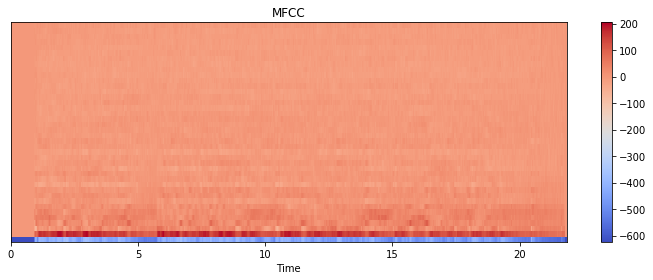

In [56]:
filename = file_list[8]
print(filename)
visualize_mfcc(filename);

In [71]:
total_ratio = 0.
cnt = 0

for filename in progress(file_list):
    if filename.endswith('.mp3'):
        cnt += 1
        mfccs = get_mfcc(filename)
#         portions = filename.split('.')
#         portions[-1] = 'ftr' # stands for feature
#         newname = '.'.join(portions)
#         with open(newname, 'wb') as f:
#             pickle.dump(mfccs, f)
print('Done.')

total_ratio /= cnt
total_ratio

100%|██████████| 73/73 [00:02<00:00, 28.95it/s]

Done.


93.80235476687636